# **By:  Sally Ghosn**

---
task  **3**
 
**Exploratory Data Analysis - Retail**

Data Science & Business Analytics Intern 


---




**importing the libraries**

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
matplotlib.use('nbAgg',warn=False, force=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


Let's load the data and take a look at the first five items in our dataset.

In [ ]:
#load the dataset
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Visualizing Data using Matplotlib**

<IPython.core.display.Javascript object>

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

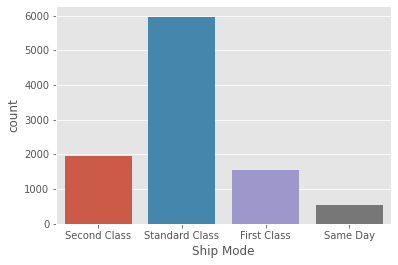

In [ ]:
sns.countplot(x=df['Ship Mode'])
df['Ship Mode'].value_counts()

<IPython.core.display.Javascript object>

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

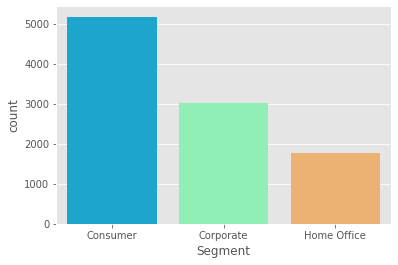

In [ ]:
sns.countplot(x = 'Segment',data = df, palette = 'rainbow')
df['Segment'].value_counts()

<IPython.core.display.Javascript object>

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

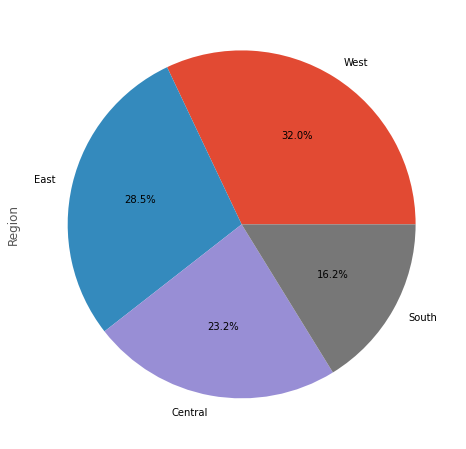

In [ ]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

df['Region'].value_counts()

<IPython.core.display.Javascript object>

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

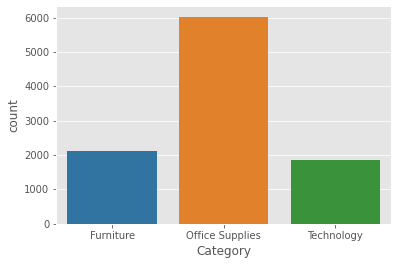

In [ ]:
sns.countplot(x='Category',data=df,palette='tab10')
df['Category'].value_counts()

<IPython.core.display.Javascript object>

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

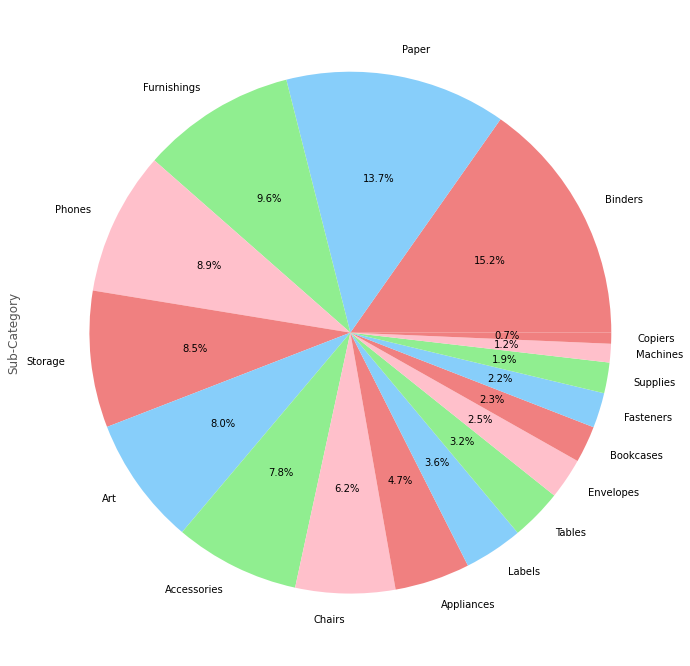

In [ ]:
color=[ 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%',colors=color)
plt.show()

df['Sub-Category'].value_counts()

<IPython.core.display.Javascript object>

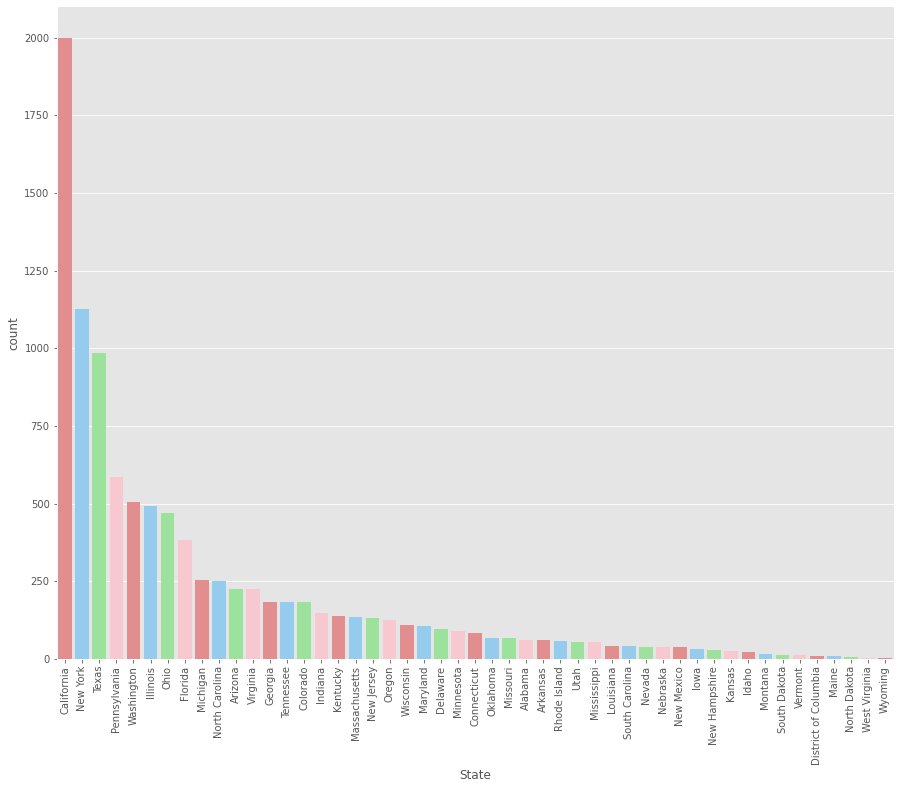

In [ ]:
color=[ 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette=color,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Clean up the dataset to remove columns that are not informative to us for visualization .**

In [ ]:
df=df.drop(columns=['Ship Mode','Country','Postal Code','Segment'])

In [ ]:
df.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


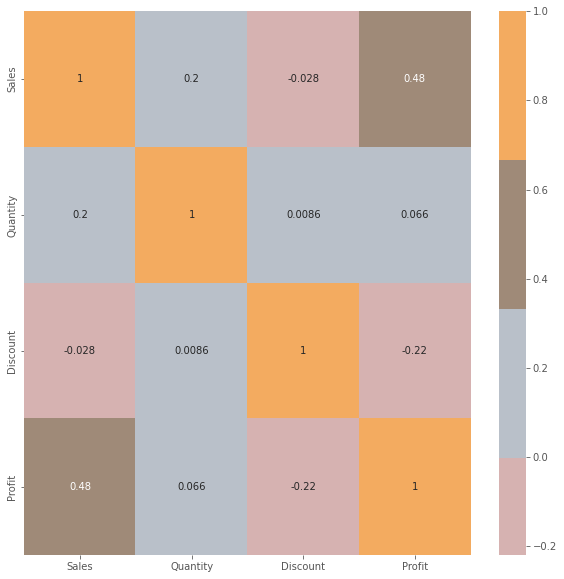

In [ ]:
from matplotlib import colors

#correlation matrix
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= df.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Let's find out how many entries there are in our dataset.

**Distribution of the data using the plot**

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

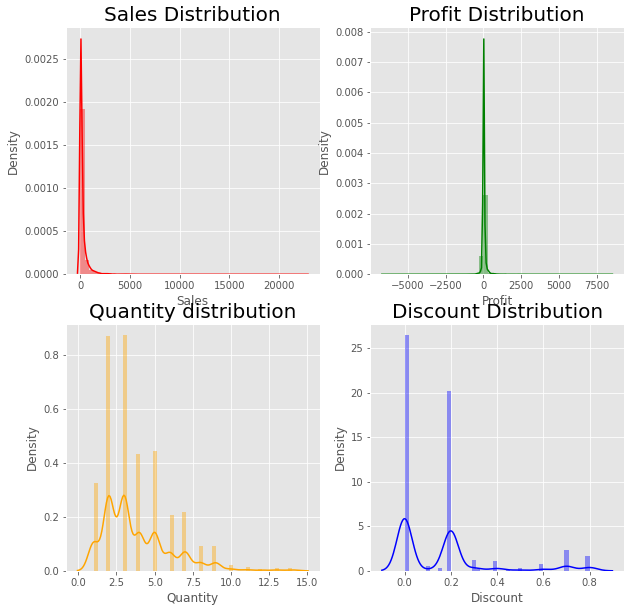

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

**Statewise Deal Analysis**


California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64


<IPython.core.display.Javascript object>

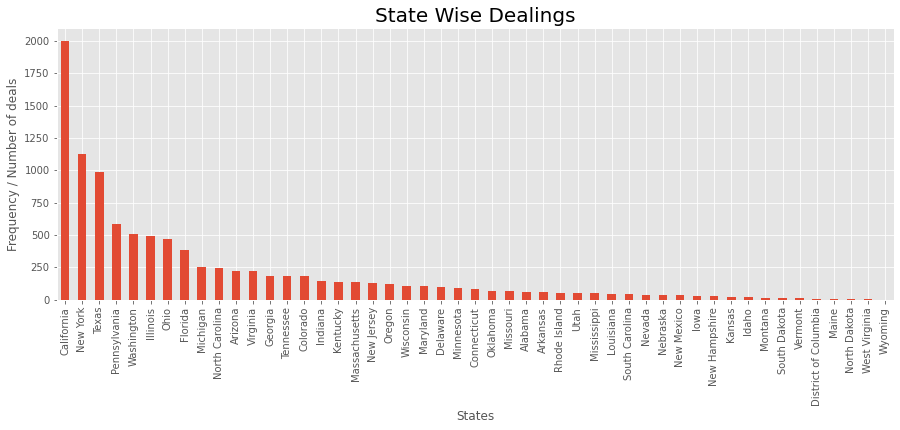

In [ ]:
df1 = df['State'].value_counts()
print(df1.head(10))

df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

the top 3 state where deals are Highest.

1- Califonia

2- New York

3- Texas

Wyoming: Lowest Number of deal

**City Wise analysis of the dealing**


New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64


<IPython.core.display.Javascript object>

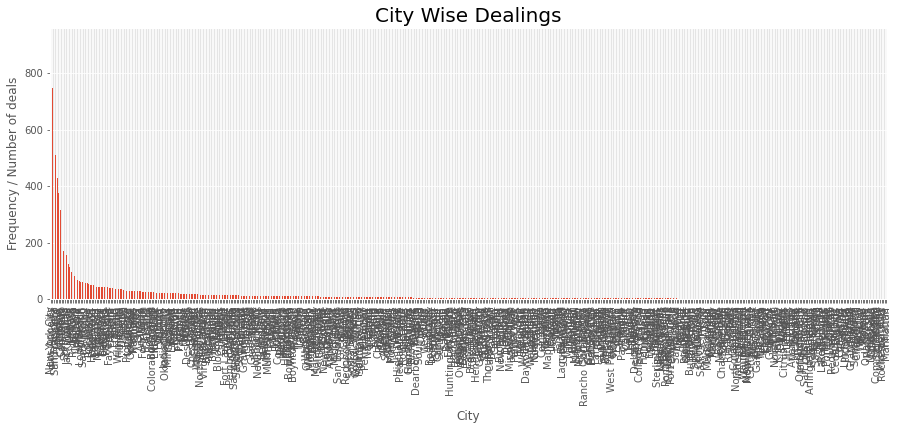

In [ ]:
df2 = df['City'].value_counts()
print(df2.head())

df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

top 50 city 

<IPython.core.display.Javascript object>

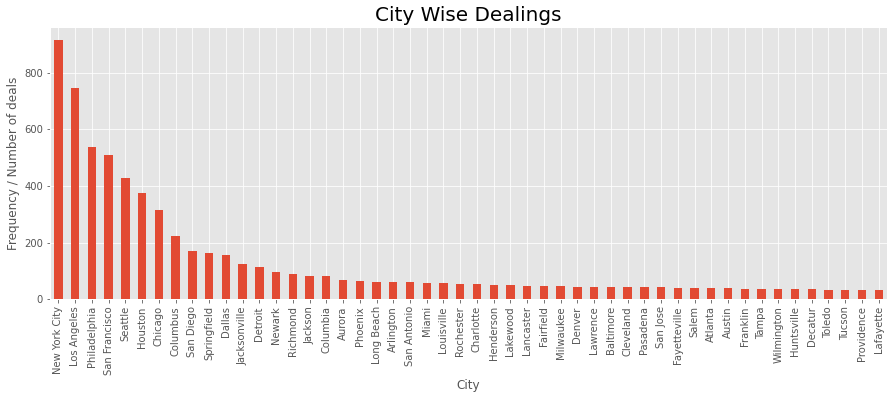

In [ ]:
df3=df2.head(50)
df3.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 city where deals are Highest.

1. New York City
2. Los Angeles
3. Philadelphia

**lowest 50 city**

<IPython.core.display.Javascript object>

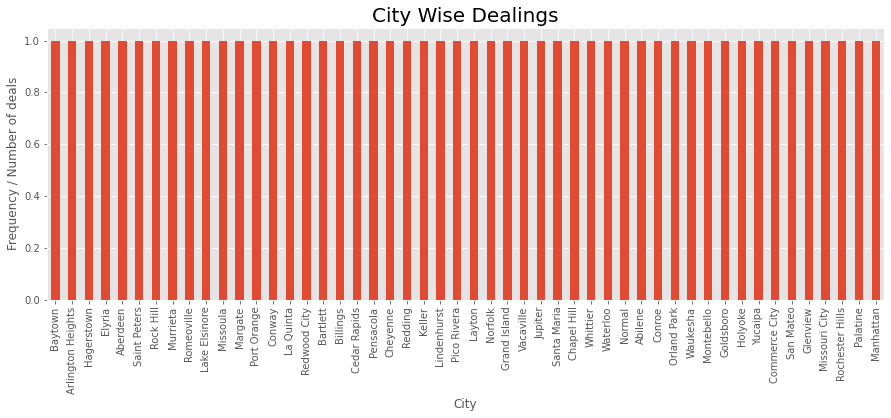

In [ ]:
df4=df2.tail(50)
df4.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 20)
plt.show()

**Segment wise analysis of Profit, Discount and sell**

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

                  Sales  Discount     Profit
Segment                                     
Consumer     223.733644  0.158141  25.836873
Corporate    233.823300  0.158228  30.456667
Home Office  240.972041  0.147128  33.818664


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

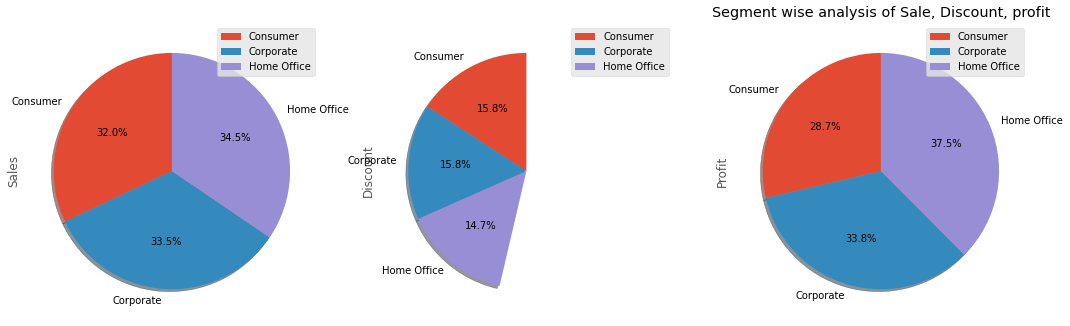

In [ ]:
print(df['Segment'].value_counts())
print()
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
print(df_segment)

#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

**Sales:**


*   Consumer : 32%
*   Corporate - 33.5%
*   Home Office : 34.5%




Discount :

*   Consumer : 15.8%
*   Corporate : 15.8%
*   Home Office : 14.7%



Profit :

*   Consumer : 15.8%
*   Corporate : 15.8%
*   Home Office : 14.7%

**Statewise analysis of Profit Discount and sell**

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

                           Sales  Discount      Profit
State                                                 
Alabama               319.846557  0.000000   94.865989
Arizona               157.508933  0.303571  -15.303235
Arkansas              194.635500  0.000000   66.811452
California            228.729451  0.072764   38.171608
Colorado              176.418231  0.316484  -35.867351
Connecticut           163.223866  0.007317   42.823071
Delaware              285.948635  0.006250  103.930988
District of Columbia  286.502000  0.000000  105.958930
Florida               233.612815  0.299347   -8.875461
Georgia               266.825217  0.000000   88.315453



<IPython.core.display.Javascript object>

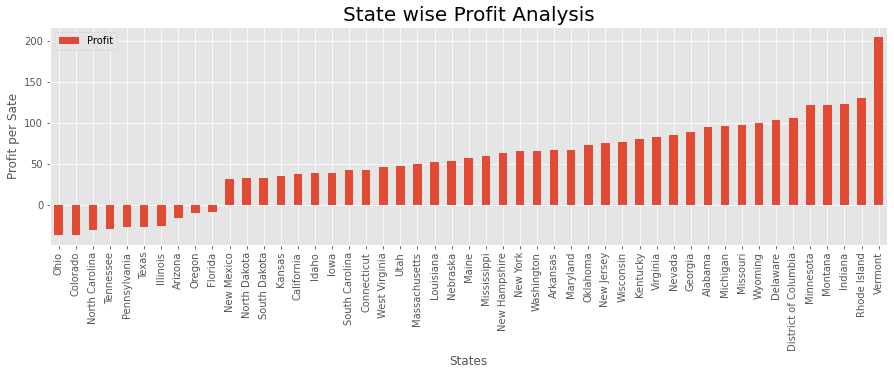

In [ ]:
print(df['State'].value_counts().head(10))
print()
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
print(df_state.head(10))
print()

df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

RESULT

*   Vermont: Highest Profit
*   Ohio: Lowest Profit

**Statewise Sale Analysis**

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'State wise analysis of Sale')

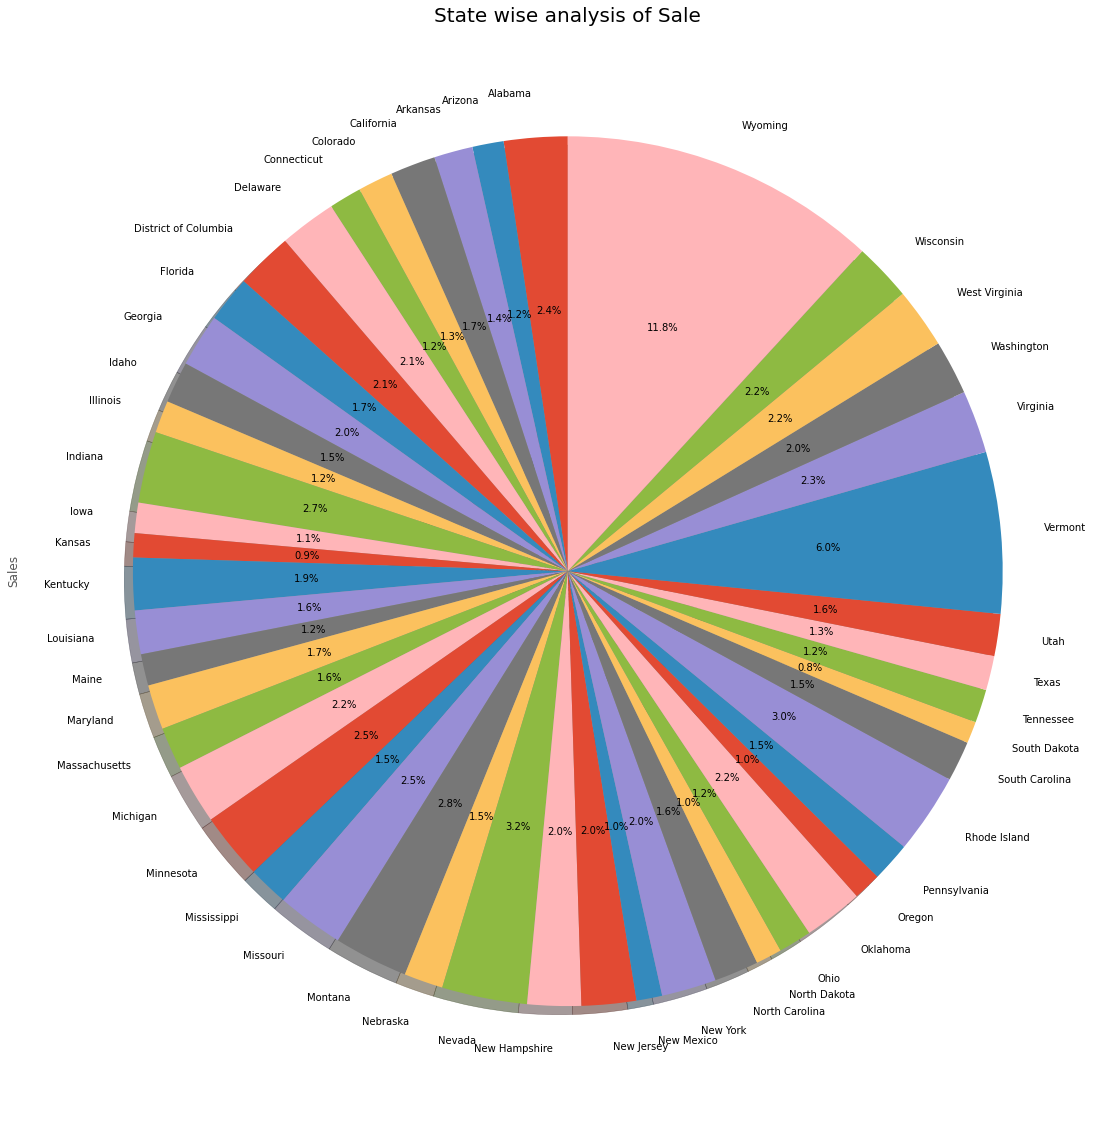

In [ ]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

*   Highest amount of sales= Wyoming(11.8%)
*   Lowest amount of sales= South Dakota(0.8%)

**Statewise Discount Analysis**

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'State wise analysis of Discount')

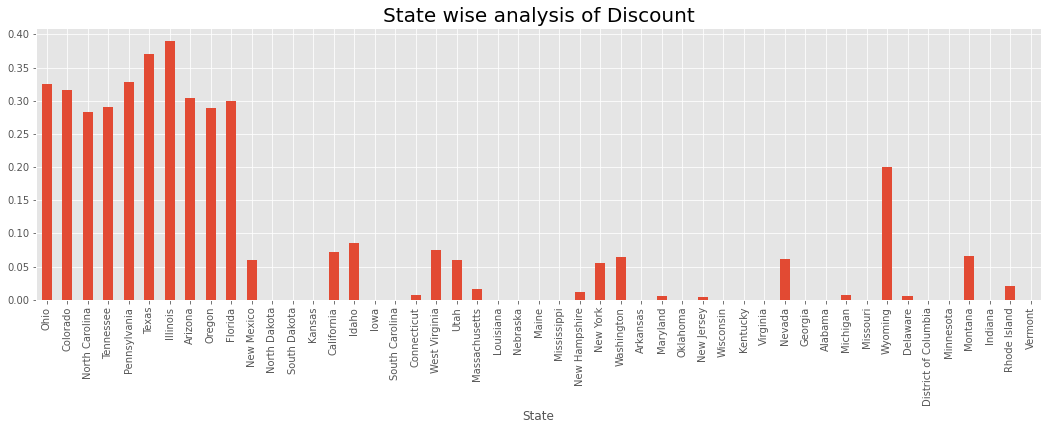

In [ ]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

**Citywise Analysis of the Profit**

                 Sales  Discount      Profit
City                                        
Bethlehem   337.926800  0.380000 -200.619160
Champaign   151.960000  0.600000 -182.352000
Oswego      107.326000  0.600000 -178.709200
Round Rock  693.436114  0.274286 -169.061614
Lancaster   215.031826  0.315217 -157.371052


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit  (High)')

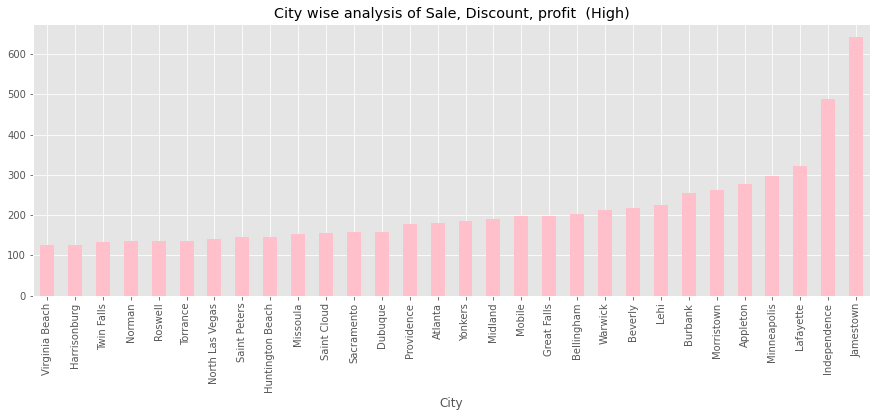

In [ ]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
print(df_city.head())

#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit  (High)')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit  (Low)')

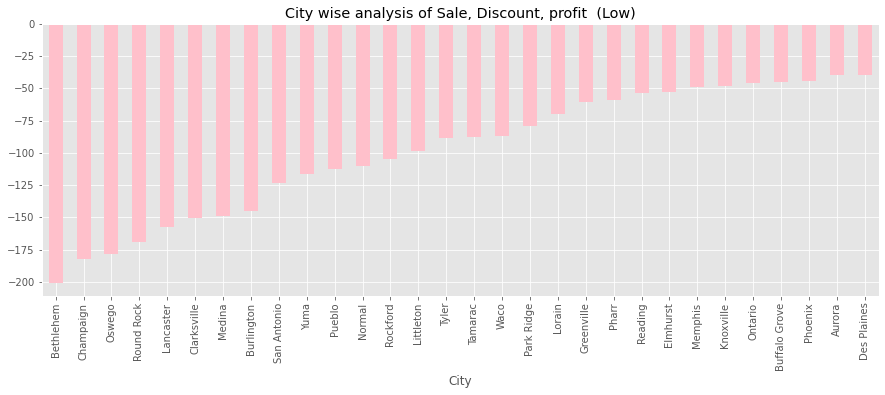

In [ ]:
#1.Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit  (Low)')

**QUANTITY WISE SALES, PROFIT AND DISCOUNT ANALYSIS**

In [ ]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

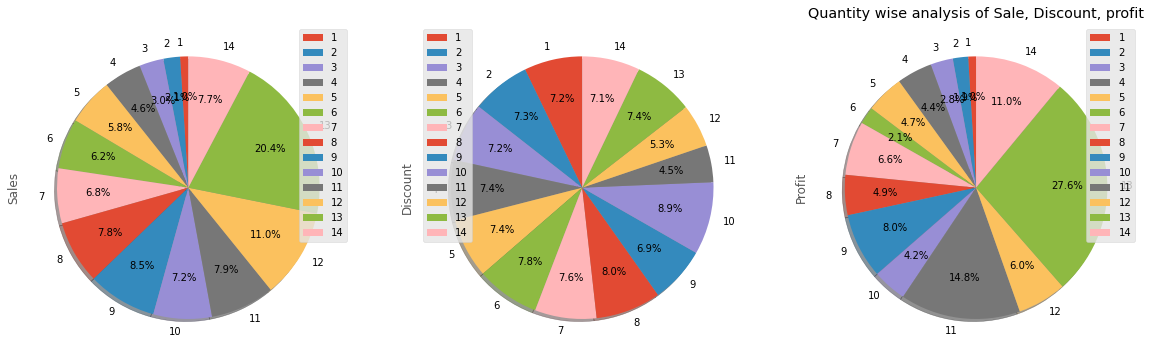

In [ ]:

#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

13 Number of Quantity is high for sales and Profit.

**CATAGORY WISE SALES DISCOUNT AND PROFIT**

In [ ]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


<IPython.core.display.Javascript object>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2776aa3d0>,
      dtype=object)

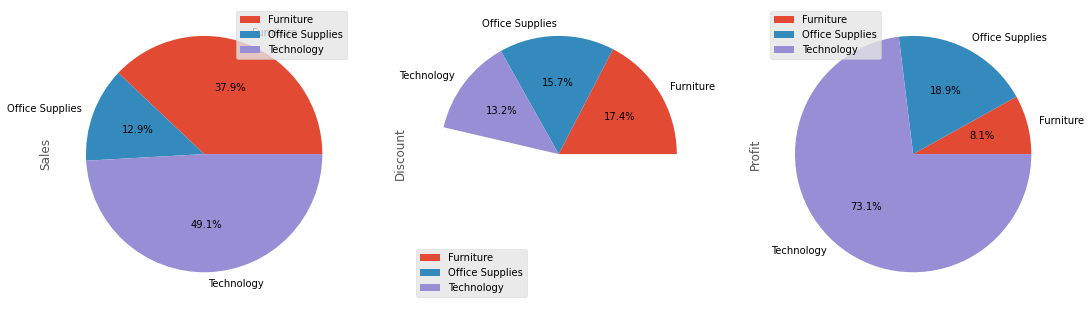

In [ ]:
df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)

*   Maximun sales and Profit obtain in Technology.
*   Minimun profit obtain in Furniture

**Sub-Category wise Sales, Profit and Discount**

In [ ]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


<IPython.core.display.Javascript object>

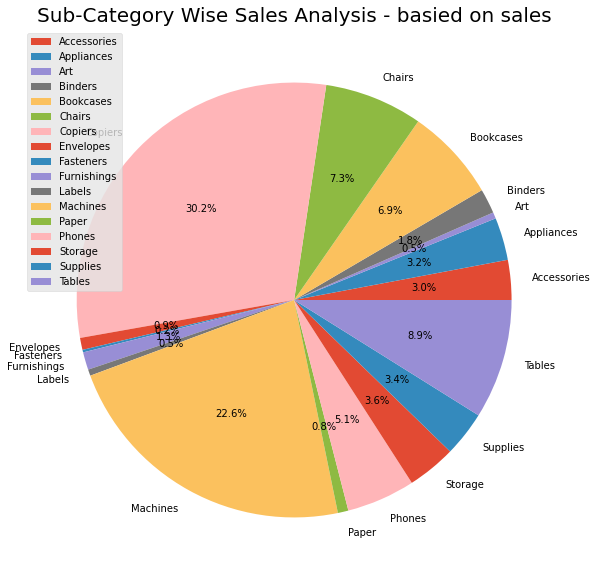

In [ ]:
#sales

plt.figure(figsize = (10,10))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis - basied on sales', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

Copier then Machine have High sales.

<IPython.core.display.Javascript object>

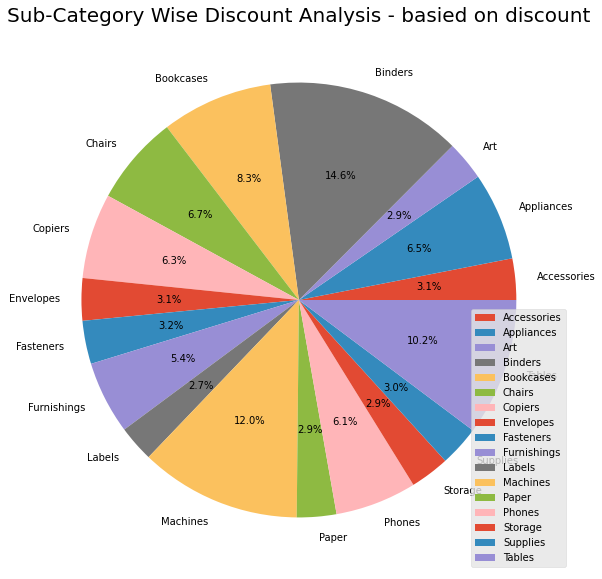

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis - basied on discount', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

Binders , Machines and then tables have high Discount.

<IPython.core.display.Javascript object>

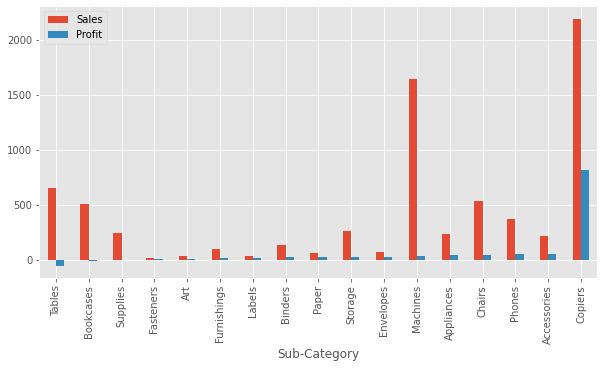

In [ ]:
#basied on profit
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])


COPIER : HIGHEST PROFIT AS WELL AS SELL

**REGION WISE ANALYSIS**

In [ ]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


<IPython.core.display.Javascript object>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc276f23b50>,
      dtype=object)

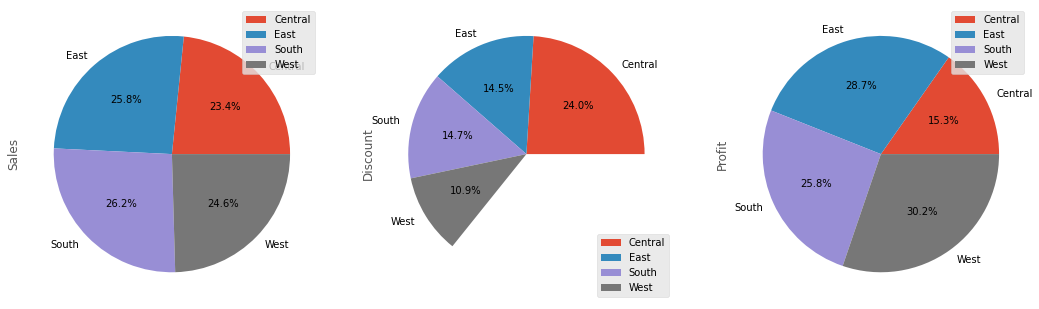

In [ ]:
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

WEST : PROFIT IS HIGH

**SHIP MODE WISE ANALYSIS**

<IPython.core.display.Javascript object>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc276f3f0d0>,
      dtype=object)

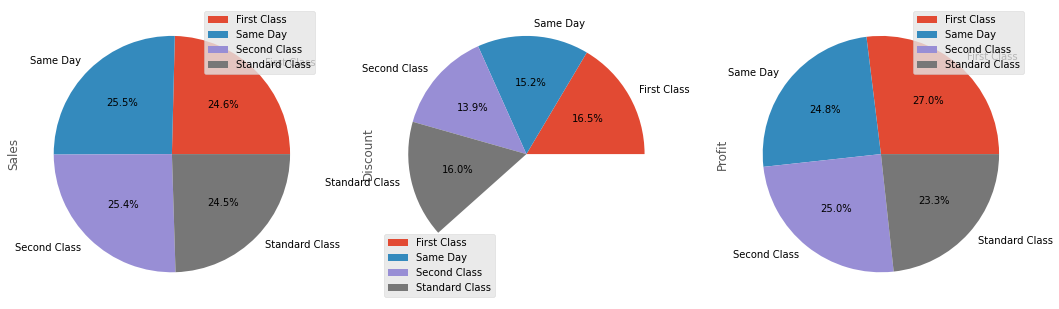

In [ ]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

Profit and Discount is high in First Class

Sales is high for Same day ship

# **RESULT AND CONCLUSION**

*   Profit is more than that of sale but there are some areas where profit could be increased.

*   Profit and Discount is high in First Class

*   Sales is high for Same day ship

*   Sub-category: Copier: High Profit & sales

*   Sub-category: Binders , Machines and then tables have high Discount.

*   Category: Maximun sales and Profit obtain in Technology.

*   Category: Minimun profit obtain in Furniture

*   State: Vermont: Highest Profit

*   State: Ohio: Lowest Profit

*   Segment: Home-office: High Profit & sales

*   Here is top 3 city where deals are Highest.
        *   New York City
        *   Los Angeles
        *   Philadelphia

*   Sales and Profit are Moderately Correlated.

*   Quantity and Profit are less Moderately Correlated.

*   Discount and Profit are Negatively Correlated

*   Here is top 3 state where deals are Highest.

        *   Califonia
        *   New York
        *   Texas

*   Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)

*   Lowest amount of sales= South Dakota(0.8%)